## 1T. Тема 3.3 CV - компьютерное зрение. Задание

## Задание

**1. Лёгкий уровень (Задание не обязательно к выполнению)**


Запишите видео с собой (допустим, держащим лист с надписью «1Т») из примера ноутбука занятия. Вставьте скриншот себя в ваш ноутбук с кодом (вы должны быть обведены в зеленый квадрат, детектированы нейронной сетью как в скринкастах), на котором будут видны сопровождающие надписи вокруг рамки видео: «Захват изображения..."» и «Чтобы завершить...».

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 7.6 MB/s eta 0:00:00


In [1]:
from IPython.display import Javascript
from IPython.display import Image as Image2
from IPython import display
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import torch
from PIL import Image as Image1
import gc

In [2]:
#Устанавливаем Yolo V5 (large) для распознавания

detector = torch.hub.load('ultralytics/yolov5', 'custom',
                              path = 'yolov5m.pt') #'yolov5s.pt'
print('#'*60)
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'}), OpenCV: {cv2.__version__}")

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 249.8 MB/s eta

############################################################
Using torch 2.0.1+cu118 (Tesla T4), OpenCV: 4.7.0


In [3]:
# Список детектируемых классов
coco_labels = '''person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
street sign
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
hat
backpack
umbrella
shoe
eye glasses
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
plate
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
mirror
dining table
window
desk
toilet
door
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
blender
book
clock
vase
scissors
teddy bear
hair drier
toothbrush
hair brush'''.split()

--2023-08-11 12:04:22--  https://bikepedia.ru/wp-content/uploads/2020/06/v-kakih-sluchayah-perevozit-sobaku-na-velosipede.jpg
Resolving bikepedia.ru (bikepedia.ru)... 91.106.207.40
Connecting to bikepedia.ru (bikepedia.ru)|91.106.207.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113395 (111K) [image/jpeg]
Saving to: ‘detect.jpg’

detect.jpg          100%[===================>] 110.74K   384KB/s    in 0.3s    

2023-08-11 12:04:23 (384 KB/s) - ‘detect.jpg’ saved [113395/113395]



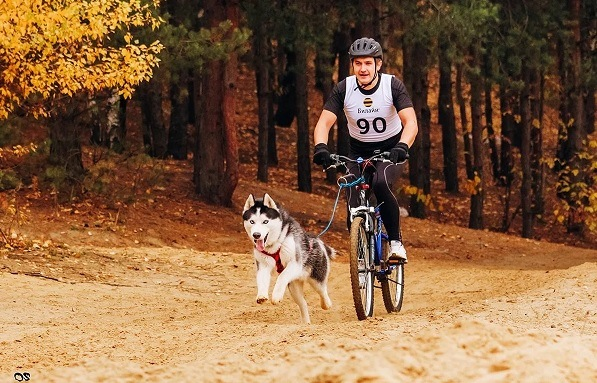

In [4]:
#!wget https://minlife.ru/wp-content/uploads/2019/02/%D0%AF-%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE-%D0%BF%D1%8B%D1%82%D0%B0%D1%8E%D1%81%D1%8C-%D0%B1%D1%8B%D1%82%D1%8C-%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA%D0%BE%D0%BC.jpg -O detect.jpg
!wget https://bikepedia.ru/wp-content/uploads/2020/06/v-kakih-sluchayah-perevozit-sobaku-na-velosipede.jpg -O detect.jpg
image_path = 'detect.jpg'
img = Image1.open(image_path)
img = np.array(img)
img = cv2.resize(img, (1040,480))

display.display(display.Image(image_path, width=1024))

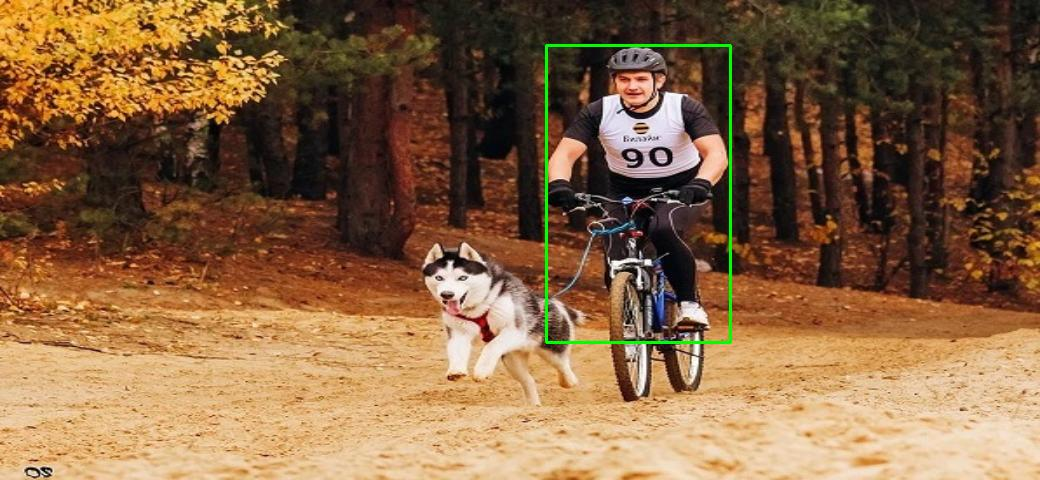

In [5]:
# детекция
cur = detector(img)
yolo_preds = cur.xyxy[0].cpu().numpy()

# получение коодинат прямоугольников
boxes = yolo_preds[:, :4]  # xmin, ymin, xmax, ymax
confs = yolo_preds[:, 4]
labels = yolo_preds[:, 5]

fst_box_flag = 1

# получаем конкретные прямоугольники
for box, conf, label in zip(boxes, confs, labels):
    if coco_labels[int(label)] == 'person': #and fst_box_flag == 1: #
        #x1, x2, y1, y2 = int(box[1]), int(box[3]), int(box[0]), int(box[2])
        y1, y2, x1, x2 = int(box[1]), int(box[3]), int(box[0]), int(box[2])

        img = cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2) # рисуем прямоугольник
        fst_box_flag = 0

output_image_path = 'detection_results.jpg'
Image1.fromarray(img.astype(np.uint8)).save(output_image_path)
display.display(display.Image(output_image_path, width=1024))

И посмотрю второй метод детекции и рамок:

In [6]:
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)
def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}
  #Define colors
  if colors == []:
    #colors = [(6, 112, 83), (253, 246, 160), (40, 132, 70), (205, 97, 162), (149, 196, 30), (106, 19, 161), (127, 175, 225), (115, 133, 176), (83, 156, 8), (182, 29, 77), (180, 11, 251), (31, 12, 123), (23, 6, 115), (167, 34, 31), (176, 216, 69), (110, 229, 222), (72, 183, 159), (90, 168, 209), (195, 4, 209), (135, 236, 21), (62, 209, 199), (87, 1, 70), (75, 40, 168), (121, 90, 126), (11, 86, 86), (40, 218, 53), (234, 76, 20), (129, 174, 192), (13, 18, 254), (45, 183, 149), (77, 234, 120), (182, 83, 207), (172, 138, 252), (201, 7, 159), (147, 240, 17), (134, 19, 233), (202, 61, 206), (177, 253, 26), (10, 139, 17), (130, 148, 106), (174, 197, 128), (106, 59, 168), (124, 180, 83), (78, 169, 4), (26, 79, 176), (185, 149, 150), (165, 253, 206), (220, 87, 0), (72, 22, 226), (64, 174, 4), (245, 131, 96), (35, 217, 142), (89, 86, 32), (80, 56, 196), (222, 136, 159), (145, 6, 219), (143, 132, 162), (175, 97, 221), (72, 3, 79), (196, 184, 237), (18, 210, 116), (8, 185, 81), (99, 181, 254), (9, 127, 123), (140, 94, 215), (39, 229, 121), (230, 51, 96), (84, 225, 33), (218, 202, 139), (129, 223, 182), (167, 46, 157), (15, 252, 5), (128, 103, 203), (197, 223, 199), (19, 238, 181), (64, 142, 167), (12, 203, 242), (69, 21, 41), (177, 184, 2), (35, 97, 56), (241, 22, 161)]
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]

  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
    cv2_imshow(image) #if used in Colab
  else :
    cv2.imshow(image) #if used in Python

In [7]:
!pip install ultralytics &> /dev/null

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.8MB/s]



0: 416x640 1 person, 1 bicycle, 1 dog, 230.7ms
Speed: 2.7ms preprocess, 230.7ms inference, 7.3ms postprocess per image at shape (1, 3, 416, 640)


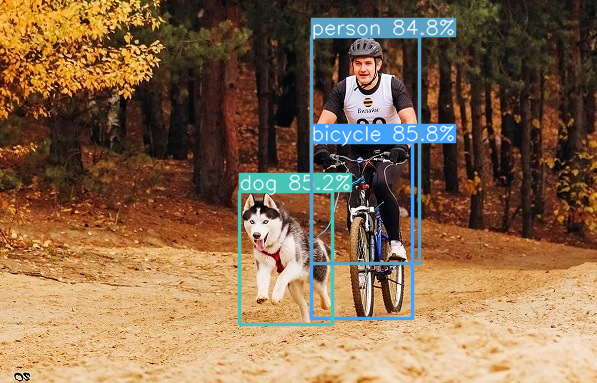

In [8]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://bikepedia.ru/wp-content/uploads/2020/06/v-kakih-sluchayah-perevozit-sobaku-na-velosipede.jpg")
image = Image.open(BytesIO(response.content))
image = np.asarray(image)

results = model.predict(image)

plot_bboxes(image, results[0].boxes.data, conf=0.5)

*Интересно, оба метода определили людей на фото, второй метод более расширенный и определил собаку и велосипед дополнительно. Буду углубляться в тему самостоятельно.*

**2. PRO уровень (Задание не обязательно к выполнению)**

Доработав код захвата видео с камеры, сделайте запись видео с собой сегментированным, выводящим рукой надпись «1Т». Приложите ту часть кода на Python, которая ответственна за создание файла видео. Так же, как и в легком уровне, приложите скриншот сегментированного человека (это можете быть вы или какое-либо видео с человеком).

У меня получилось выполнить детекцию движения:

In [ ]:
import numpy as np
import cv2
video = cv2.VideoCapture("3-3/video_preview_h264.mp4")
ret, frame1 = video.read()
ret, frame2 = video.read()
while video.isOpened():
    difference = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, threshold = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilate = cv2.dilate(threshold, None, iterations=3)
    contour, _ = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(frame1, contour, -1, (0, 0, 255), 2)
    cv2.imshow("image", frame1)
    frame1 = frame2
    ret, frame2 = video.read()
    if cv2.waitKey(40) == ord('q'):
        break
video.release()

In [ ]:
# ссылка на оригинал видео https://video-previews.elements.envatousercontent.com/files/d02a1a14-0d2e-420e-b395-ad1c111b2ade/video_preview_h264.mp4

И захват лиц:

In [ ]:
from platform import release
import cv2

def face_capture():
    cascade_path = '3-3/haarcascade_frontalface_default.xml'
    clf = cv2.CascadeClassifier(cascade_path)
    camera = cv2.VideoCapture(0)

    while True:
        _, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = clf.detectMultiScale(
            gray,

            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )

        for (x, y, width, height) in faces:
            cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 255, 255), 2)

        cv2.imshow('Super Faces', frame)

        if cv2.waitKey(1) == ord('h'):
            break

    camera.release()
    cv2.destroyAllWindows()


def main():
    face_capture()

if __name__ == '__main__':
    main()